In [ ]:
"""
Stock Analysis Dashboard

This program generates a graphical dashboard displaying stock prices, a 14-day moving average, and volume information. It helps users make buy or sell decisions based on the relationship between the current price and the moving average.

"""

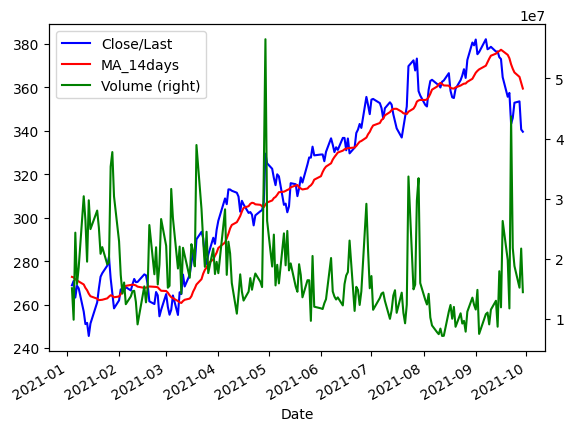

In [7]:
import pandas as pd

def clean_data(df):
    """
    Cleans the specified columns in the DataFrame by removing dollar signs and converting to float.

    Args:
        df (DataFrame): Input DataFrame.

    Returns:
        DataFrame: Cleaned DataFrame.
    """
    columns_to_clean = ['Open', 'High', 'Low', 'Close/Last']

    for column in columns_to_clean:
        df[column] = df[column].str.replace('$', '').astype(float)

    return df

# Read the CSV file and clean the data
df = pd.read_csv(
    '/Users/ilo/Desktop/PYTHON/Praktyczny_Python/M08/data/fb.csv',
    parse_dates=['Date'],
    index_col='Date',
    engine='python',
).sort_index()

df = clean_data(df).assign(
    MA_14days=lambda x: x['Close/Last'].rolling(window=14).mean() # Calculate the 14-day moving average
)


# Plot the closing price, moving average and volume.
df['2021-01-01':].plot(
    y=['Close/Last', 'MA_14days', 'Volume'],
    secondary_y=['Volume'],
    style={
        'Close/Last': "b",
        'MA_14days': 'r',
        'Volume': "g"
     },
);
